<a href="https://colab.research.google.com/github/cheredoua/ImageBind/blob/main/la_fiabilite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paramètre d'échelle alpha : 1188.5814355904492
Paramètre de forme beta : 6.3133254379993184


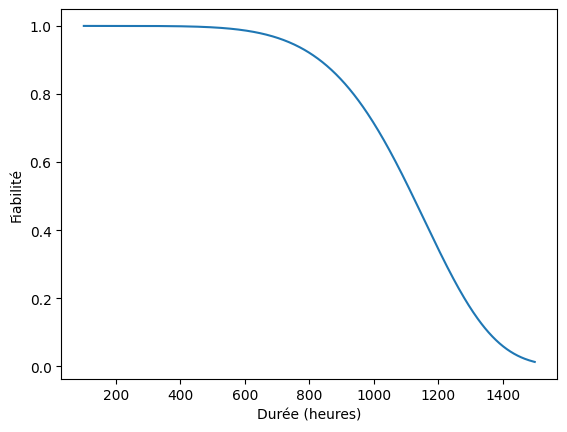

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Les données sont les temps de fonctionnement avant panne
data = [120, 350, 490, 600, 750, 1220, 1380]

# Calcul des paramètres de Weibull

# Maximum de vraisemblance
def beta(x):
    return np.mean(np.log(x))
def alpha(x):
    return np.exp(beta(x) + np.sqrt(np.var(np.log(x))))

beta_value = beta(data)
alpha_value = alpha(data)

print(f"Paramètre d'échelle alpha : {alpha_value}")
print(f"Paramètre de forme beta : {beta_value}")

# Tracé de la fonction de fiabilité de Weibull
x = np.linspace(100, 1500, 500)
y = np.vectorize(lambda t: np.exp(-(t/alpha_value)**beta_value))(x)

plt.plot(x, y)
plt.xlabel('Durée (heures)')
plt.ylabel('Fiabilité')
plt.show()

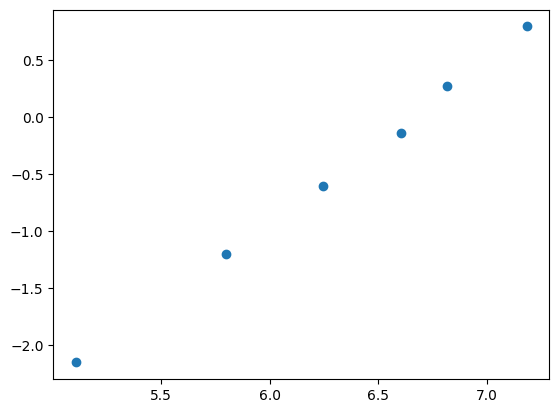

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Données
t = [165, 330, 515, 740, 915, 1320]
F = [0.11, 0.26, 0.42, 0.58, 0.73, 0.89]

# Tracé papier Weibull
ln_t = np.log(t)
ln_ln_1_F = np.log(-np.log(1 - np.array(F)))
plt.plot(ln_t, ln_ln_1_F, 'o')

beta = 1.4076135328023247
eta = 8.567176739903969e-05


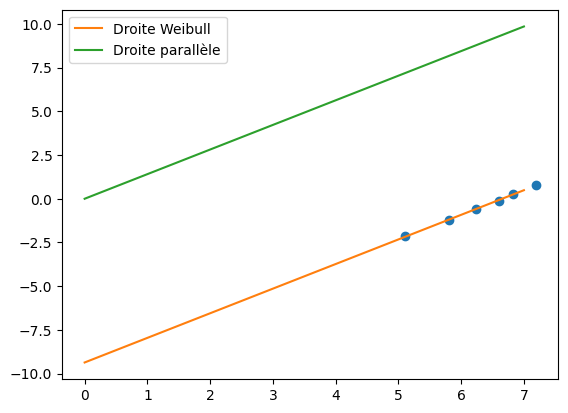

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données Weibull
t = [165, 330, 515, 740, 915, 1320]
F = [0.11, 0.26, 0.42, 0.58, 0.73, 0.89]

# Transformation Weibull
ln_t = np.log(t)
ln_ln_1_F = np.log(-np.log(1 - np.array(F)))

# Tracé nuage de points
plt.plot(ln_t, ln_ln_1_F, 'o')

# Régression linéaire
beta, eta = np.polyfit(ln_t, ln_ln_1_F, 1)

# Tracé de la droite de Weibull
x1 = np.linspace(0, 7, 100)
y1 = beta*x1 + eta
plt.plot(x1, y1, label='Droite Weibull')

# Tracé de la droite parallèle à l'origine
x2 = np.linspace(0, 7, 100)
y2 = beta*x2
plt.plot(x2, y2, label='Droite parallèle')

# Affichage des paramètres
print("beta =", beta)
print("eta =", np.exp(eta))

plt.legend()
plt.show()

Beta : 1.4076135328023247
Eta : -9.364987221886665
MTBF : -8.528272193178976


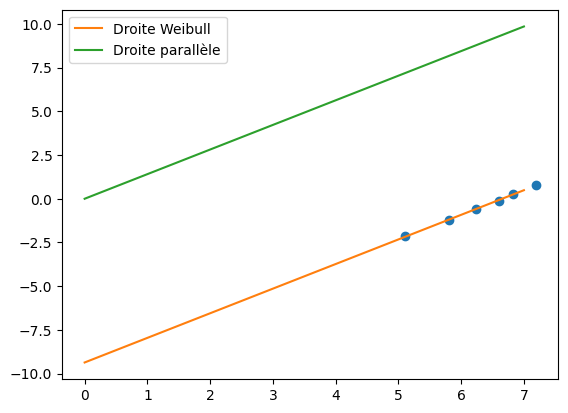

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

# Données Weibull
t = [165, 330, 515, 740, 915, 1320]
F = [0.11, 0.26, 0.42, 0.58, 0.73, 0.89]

# Transformation Weibull
ln_t = np.log(t)
ln_ln_1_F = np.log(-np.log(1 - np.array(F)))

# Tracé nuage de points
plt.plot(ln_t, ln_ln_1_F, 'o')

# Régression linéaire
beta, eta = np.polyfit(ln_t, ln_ln_1_F, 1)

# Tracé droite Weibull
x1 = np.linspace(0, 7, 100)
y1 = beta*x1 + eta
plt.plot(x1, y1, label='Droite Weibull')

# Tracé droite parallèle
x2 = np.linspace(0, 7, 100)
y2 = beta*x2
plt.plot(x2, y2, label='Droite parallèle')

# Calcul MTBF
MTBF = eta * gamma(1 + 1/beta)

# Affichage résultats
print("Beta :", beta)
print("Eta :", eta)
print("MTBF :", MTBF)

plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


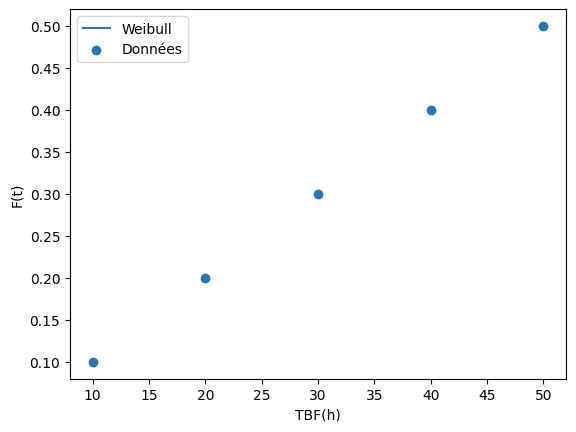

Forme (shape) = 2.2938046690034097
Echelle (scale) = 0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import weibull_min

# Tableau avec données F(t) et TBF
data = {'F(t)': [0.1, 0.2, 0.3, 0.4, 0.5],
        'TBF(h)': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Ajustement Weibull
params = weibull_min.fit(df['TBF(h)'], floc=0)
shape, scale = params[:2]

# Tracé
x = np.linspace(0, max(df['TBF(h)']), 100)
y = weibull_min.cdf(x, shape, scale=scale)

plt.plot(x, y, label='Weibull')
plt.scatter(df['TBF(h)'], df['F(t)'], label='Données')
plt.xlabel('TBF(h)'); plt.ylabel('F(t)')
plt.legend()
plt.show()

print(f"Forme (shape) = {shape}")
print(f"Echelle (scale) = {scale}")

Beta : 2.2938046690034097
Eta : 0
MTBF : 0.0


<ipython-input-13-91caf70c98e4>:7: RuntimeWarning: divide by zero encountered in log
  y1 = beta*np.log(x1) + eta
<ipython-input-13-91caf70c98e4>:12: RuntimeWarning: divide by zero encountered in log
  y2 = beta*np.log(x2)


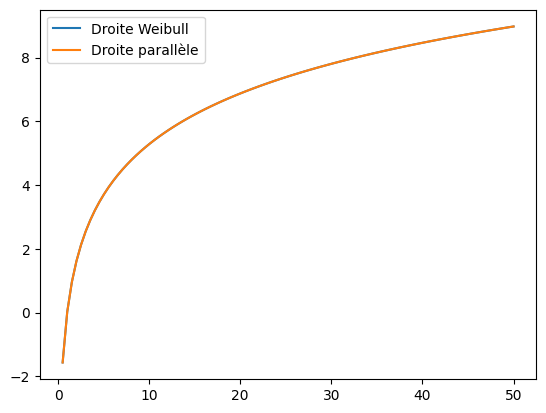

In [ ]:
# Paramètres Weibull
beta = shape
eta = scale

# Tracé droite Weibull
x1 = np.linspace(0, max(df['TBF(h)']), 100)
y1 = beta*np.log(x1) + eta
plt.plot(x1, y1, label='Droite Weibull')

# Tracé droite parallèle
x2 = np.linspace(0, max(df['TBF(h)']), 100)
y2 = beta*np.log(x2)
plt.plot(x2, y2, label='Droite parallèle')

# Calcul MTBF
from scipy.special import gamma
MTBF = eta * gamma(1 + 1/beta)

# Affichage résultats
print("Beta :", beta)
print("Eta :", eta)
print("MTBF :", MTBF)

plt.legend()
plt.show()

In [ ]:
mport numpy as np

tbf = [1, 2, 3, ..., 10]

# Conversion en floats
tbf = np.array(tbf)
tbf = tbf.astype(float)

# Transformation Weibull
# ... Reste du code

SyntaxError: ignored